# Libraries

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import numpy as np
import scqubits as sq
from src.utilities import *
from src.fluxonium import calculate_CQPS_rate, create_fluxonium_resonator
import scipy.constants as const
import matplotlib.pyplot as plt
from src.fluxonium_manager import FluxoniumManager
# sq.set_units('GHz')
sq.settings.T1_DEFAULT_WARNING=False
from tqdm.notebook import tqdm
%matplotlib inline

In [4]:
fm = FluxoniumManager(flux=0, cutoff=100)
fluxonium = fm.fluxonium_creator(
    small_jj_area=0.18**2,
    n_junctions=252,
    flux=0
)
fluxonium

Fluxonium(**{'EJ': 3.310095634337319, 'EC': 4.427606286739452, 'EL': 0.20108360702421496, 'flux': 0, 'cutoff': 100, 'truncated_dim': 6, 'id_str': 'Fluxonium_2', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None})

# Comparing with N. Roch coherence times

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

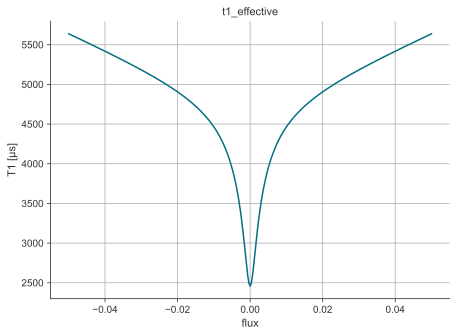

In [239]:
roch_fluxonium = sq.Fluxonium(
    EJ=6.02,
    EC=1.59,
    EL=0.1647,
    flux=0,
    cutoff=40
)

fig, ax = roch_fluxonium.plot_t1_effective_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(-0.05,0.05,301),
    noise_channels=[
        # 't1_inductive',
        # 't1_flux_bias_line',
        # 't1_quasiparticle_tunneling',
        't1_capacitive',
    ],
    scale=1e-3,
    )
ax.set_ylabel("T1 [µs]")
ax.set_yscale('linear')

The difference with the measured (around 15 µs) is due to the value of the $Q_{cap}(\omega_r)$ which by default in scqubits it's $10^6$ but to match with the experimental results it has to be 40k. There is an error in  the N. Roch paper Eq. (3) by factor 2, that's why I use 80k instead of 40k.

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

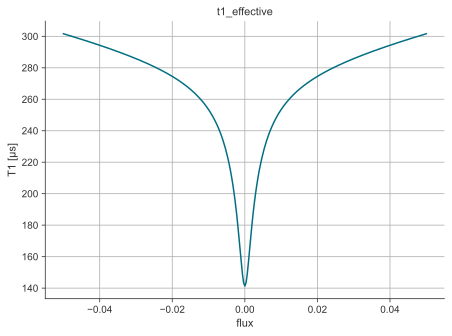

In [245]:
roch_fluxonium = sq.Fluxonium(
    EJ=6.02,
    EC=1.59,
    EL=0.1647,
    flux=0,
    cutoff=40
)

fig, ax = roch_fluxonium.plot_t1_effective_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(-0.05,0.05,301),
    noise_channels=[
        # 't1_inductive',
        # 't1_flux_bias_line',
        # 't1_quasiparticle_tunneling',
        ('t1_capacitive', dict(Q_cap = 80e3 * (6/roch_fluxonium.E01())**0.2)),
    ],
    scale=1e-3,
    )
ax.set_ylabel("T1 [µs]")
ax.set_yscale('linear')

In [79]:
fluxonium_quantro = sq.Fluxonium(
    EJ=10.5,
    EC=1.7,
    EL=0.367,
    flux=0,
    cutoff=50
)

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

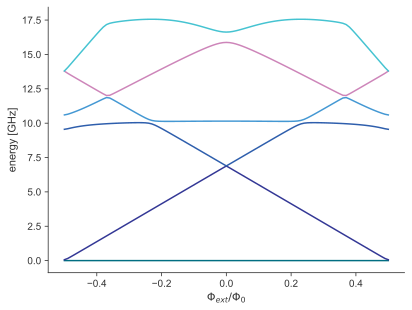

In [255]:
fig, ax = fluxonium_quantro.plot_evals_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(-0.5,0.5,101),
    subtract_ground=True
)

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

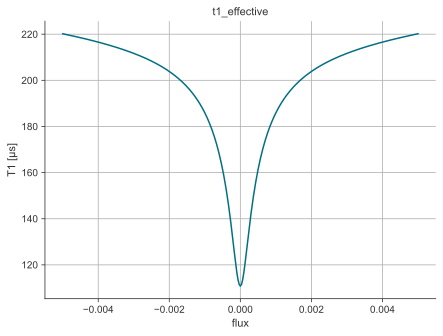

In [249]:
fig, ax = fluxonium_quantro.plot_t1_effective_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(-0.005,0.005,301),
    noise_channels=[
        # 't1_inductive',
        't1_flux_bias_line',
    #     # 't1_quasiparticle_tunneling',
        ('t1_capacitive', dict(Q_cap = 30e3 * (6/fluxonium_quantro.E01())**0.2)),
    ],
    scale=1e-3,
)
ax.set_ylabel("T1 [µs]")
ax.set_yscale('linear')

So in our case, our $Q_{cap} = 30000$ instead of $80000$ in the case of N. Roch.

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

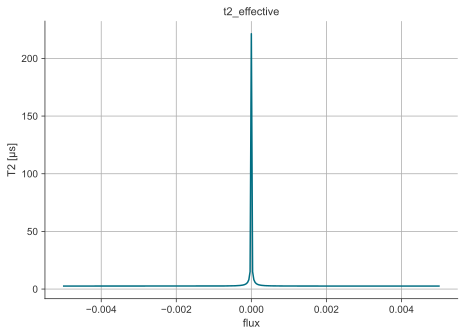

In [254]:
fig, ax = fluxonium_quantro.plot_t2_effective_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(-0.005,0.005,301),
    noise_channels=[
        ('t1_capacitive', dict(Q_cap = 30e3 * (6/fluxonium_quantro.E01())**0.2)),
        ('t1_flux_bias_line', dict(M=800)),
        't1_inductive',
        't1_quasiparticle_tunneling',
        ('tphi_1_over_f_flux',dict(A_noise=1e-06))
    ],
    scale=1e-3,
)
ax.set_ylabel("T2 [µs]")
ax.set_yscale('linear')

Assuming our T1 is 100 µs (it changes to smaller values like 30 µs sometimes). our Qcap is 35 smaller than the default to the value around 30k.

In [11]:
rate = calculate_CQPS_rate(
    fluxonium=fluxonium_quantro,
    EJj=50.67,
    ECj=0.668,
    n_junctions=136,
)

print('T CPQS: ', 1/(rate*1e9)*1e3, ' ms')

T CPQS:  493.5156876417437  ms


# Marcelo's proposal

In [355]:
fm = FluxoniumManager()
fluxonium_m = fm.fluxonium_creator(
    small_jj_area=0.035,
    n_junctions=251,
    flux=0
)

In [356]:
fluxonium_m

Fluxonium(**{'EJ': 3.5757205926483393, 'EC': 4.2829048756407975, 'EL': 0.201884736932678, 'flux': 0, 'cutoff': 50, 'truncated_dim': 6, 'id_str': 'Fluxonium_59543', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None})

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

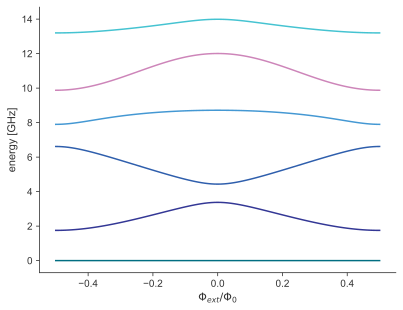

In [357]:
fig, ax = fluxonium_m.plot_evals_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(-0.5,0.5,101),
    subtract_ground=True
)

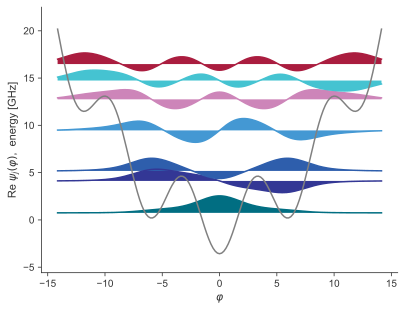

In [358]:
fig, ax = fluxonium_m.plot_wavefunction(
    which=[0,1,2,3,4,5,6]
)

In [361]:
flux_array = np.linspace(-0.5, 0.5,301)

CQPS_m_array = np.zeros(len(flux_array))
for i , flux in enumerate(tqdm(flux_array)):
    fluxonium_m.flux = flux
    CQPS_m_array[i] = calculate_CQPS_rate(
    fluxonium=fluxonium_m,
    EJj=50.67,
    ECj=0.668,
    n_junctions=251,
)
fluxonium_m.flux = 0

  0%|          | 0/301 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

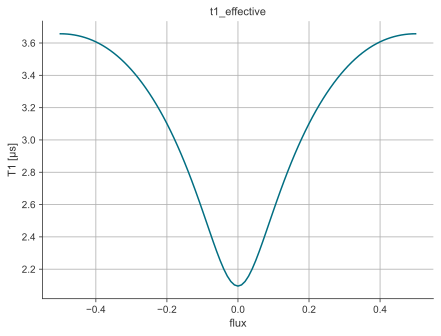

In [366]:
fig, ax = fluxonium_m.plot_t1_effective_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(-0.5,0.5,101),
    noise_channels=[
        ('t1_capacitive', dict(Q_cap = 30e3 * (6/fluxonium_m.E01())**0.2)),
        # ('t1_flux_bias_line', dict(M=800)),
        # 't1_inductive',
        # 't1_quasiparticle_tunneling',
        # ('tphi_1_over_f_flux',dict(A_noise=1e-06))
    ],
    scale=1e-3,
)

# ax.plot(flux_array,1/CQPS_m_array*1e-3)
ax.set_ylabel("T1 [µs]")
ax.set_yscale('linear')

# Fluxonium Optimization

# Phi ext = 0

In [332]:
bounds = {
    "small junction area (µm2)":    (0.01, 0.73/4),
    "hundreds of JJs":              (50,2000),
    }

optimal_0 = FluxoniumManager(flux=0, cutoff=100)
optimal_0.minimizer(bounds=bounds)

In [333]:
optimal_0.optimal_params, optimal_0.T2*1e6

([0.032844023599084546, 1810.3630915734404], 50.939518156912406)

In [334]:
optimal_0.optimal_fluxonium

Fluxonium(**{'EJ': 3.3554586151049888, 'EC': 1.6550148382507879, 'EL': 0.027990555710048583, 'flux': 0, 'cutoff': 100, 'truncated_dim': 6, 'id_str': 'Fluxonium_59538', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None})

## Coherence

In [335]:
flux_fix = optimal_0.optimal_fluxonium.flux
flux_array = np.linspace(flux_fix - 0.5, flux_fix + 0.5,301)

CQPS_flux_0_array = np.zeros(len(flux_array))
for i , flux in enumerate(tqdm(flux_array)):
    optimal_0.optimal_fluxonium.flux = flux
    CQPS_flux_0_array[i] = calculate_CQPS_rate(
    fluxonium=optimal_0.optimal_fluxonium,
    EJj=50.67,
    ECj=0.668,
    n_junctions=int(optimal_0.optimal_params[1]),
)
optimal_0.optimal_fluxonium.flux = flux_fix

  0%|          | 0/301 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

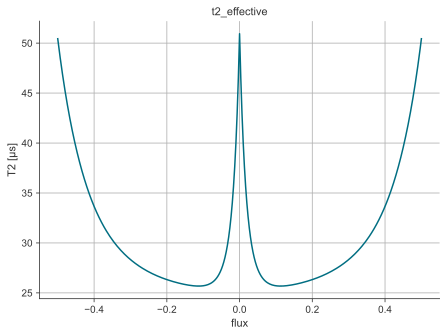

In [336]:
fig, ax = optimal_0.optimal_fluxonium.plot_t2_effective_vs_paramvals(
    param_name='flux',
    param_vals=flux_array,
    noise_channels=[
        ('t1_capacitive', dict(Q_cap = 30e3 * (6/optimal_0.optimal_fluxonium.E01())**0.2)),
        ('t1_flux_bias_line', dict(M=800)),
        't1_inductive',
        't1_quasiparticle_tunneling',
        ('tphi_1_over_f_flux',dict(A_noise=1e-06))
    ],
    scale=1e-3,
)

# ax.plot(flux_array,1/CQPS_flux_0_array*1e-3)
ax.set_ylabel("T2 [µs]")
ax.set_yscale('linear')

In [337]:
rate_interval_0 = calculate_CQPS_rate(
    fluxonium=optimal_0.optimal_fluxonium,
    EJj=50.67,
    ECj=0.668,
    n_junctions=int(optimal_0.optimal_params[1]),
)

print('T CPQS: ', 1/(rate_interval_0*1e9) * 1e3, ' ms')

T CPQS:  8.034294789020489  ms


## Eigenvalues vs. phi_ext

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

Text(0.5, 1.0, 'flux = 0')

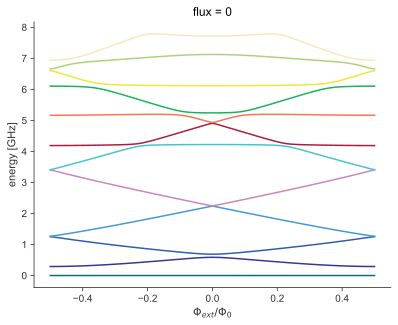

In [338]:
fig, ax = optimal_0.optimal_fluxonium.plot_evals_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(optimal_0.optimal_fluxonium.flux-0.5, optimal_0.optimal_fluxonium.flux+0.5, 101),
    evals_count=12,
    subtract_ground=True,
    )
ax.set_title(f'flux = {optimal_0.optimal_fluxonium.flux}')

## Wavefunctions

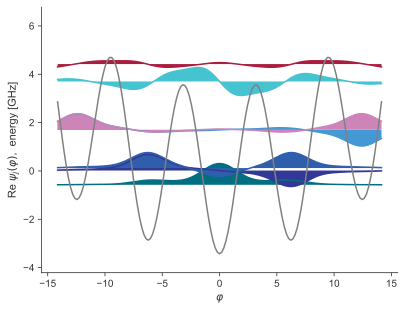

In [322]:
optimal_0.optimal_fluxonium.flux = 0
fig, ax = optimal_0.optimal_fluxonium.plot_wavefunction(
    which=[0,1,2,3,4,5,6]
)

## Phi matrix elements

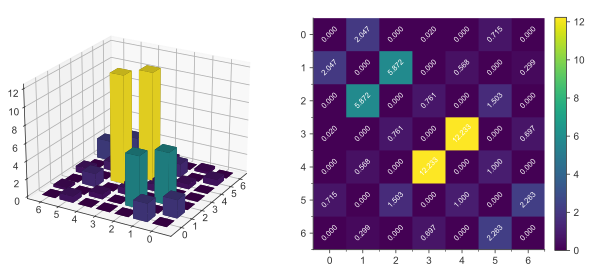

In [323]:
fig, ax = optimal_0.optimal_fluxonium.plot_matrixelements(
    operator='phi_operator',
    evals_count=7,
    show_numbers=True,
)

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

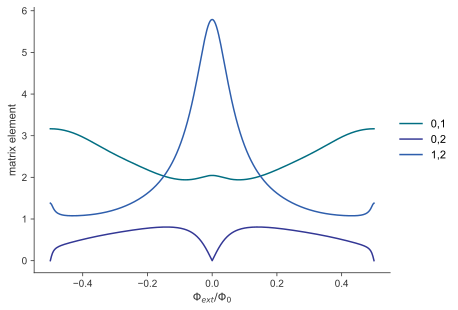

In [265]:
fig,ax = optimal_0.optimal_fluxonium.plot_matelem_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=np.linspace(-0.5,0.5,301),
    select_elems=[(0,1),(0,2),(1,2)]
)

# Phi_ext = 0.5

In [283]:
bounds = {
    "small junction area (µm2)":    (0.01, 0.73/4),
    "hundreds of JJs":              (50,2000),
    }

optimal_0_5 = FluxoniumManager(flux=0.5)
results_0_5 = optimal_0_5.minimizer(bounds=bounds)

In [284]:
optimal_0_5.optimal_params, optimal_0_5.T2*1e6

([0.07333290388212106, 64.4467506106603], 62.55218868663176)

In [312]:
optimal_0_5.optimal_fluxonium

Fluxonium(**{'EJ': 7.491942129428617, 'EC': 1.9343800972662328, 'EL': 0.7862781054118841, 'flux': 0.5, 'cutoff': 50, 'truncated_dim': 6, 'id_str': 'Fluxonium_57494', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None})

In [314]:
optimal_0_5.optimal_fluxonium.anharmonicity()

6.737900194907315

## Coherence

In [286]:
flux_fix = optimal_0_5.optimal_fluxonium.flux
flux_array = np.linspace(flux_fix - 0.5, flux_fix + 0.5,301)

CQPS_flux_0_array = np.zeros(len(flux_array))
for i , flux in enumerate(tqdm(flux_array)):
    optimal_0_5.optimal_fluxonium.flux = flux
    CQPS_flux_0_array[i] = calculate_CQPS_rate(
    fluxonium=optimal_0_5.optimal_fluxonium,
    EJj=50.67,
    ECj=0.668,
    n_junctions=int(optimal_0_5.optimal_params[1]),
)
optimal_0_5.optimal_fluxonium.flux = flux_fix

  0%|          | 0/301 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

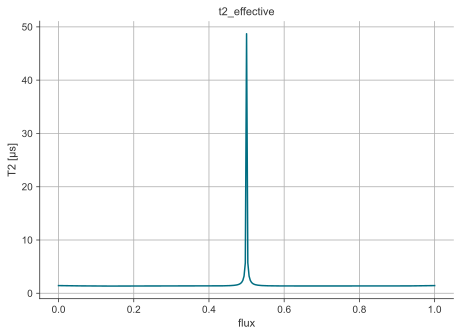

In [303]:
fig, ax = optimal_0_5.optimal_fluxonium.plot_t2_effective_vs_paramvals(
    param_name='flux',
    param_vals=flux_array,
    noise_channels=[
        ('t1_capacitive', dict(Q_cap=40 * 1e3)),
        ('t1_flux_bias_line', dict(M=800)),
        't1_inductive',
        't1_quasiparticle_tunneling',
        ('tphi_1_over_f_flux',dict(A_noise=1e-06))
    ],
    scale=1e-3,
)

# ax.plot(flux_array,1/CQPS_flux_0_array*1e-3)
ax.set_ylabel("T2 [µs]")
ax.set_yscale('linear')

## Eigenvalues vs. phi_ext

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

Text(0.5, 1.0, 'flux = 0.5')

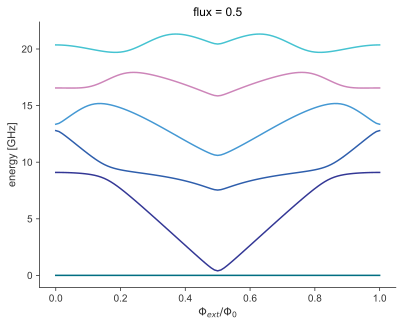

In [288]:
fig, ax = optimal_0_5.optimal_fluxonium.plot_evals_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(optimal_0_5.optimal_fluxonium.flux-0.5, optimal_0_5.optimal_fluxonium.flux+0.5, 101),
    evals_count=6,
    subtract_ground=True,
    )
ax.set_title(f'flux = {optimal_0_5.optimal_fluxonium.flux}')

## Wavefunctions

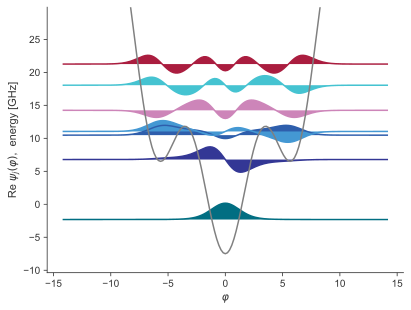

In [289]:
optimal_0_5.optimal_fluxonium.flux = 0
fig, ax = optimal_0_5.optimal_fluxonium.plot_wavefunction(
    which=[0,1,2,3,4,5,6]
)

## Phi matrix elements

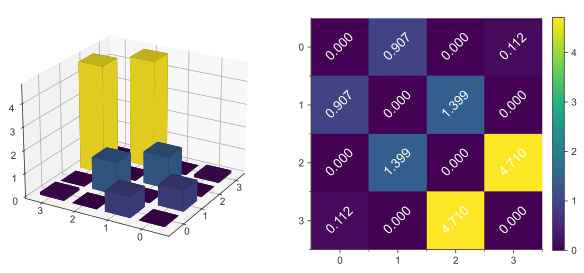

In [290]:
fig, ax = optimal_0_5.optimal_fluxonium.plot_matrixelements(
    operator='phi_operator',
    evals_count=4,
    show_numbers=True,
)

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

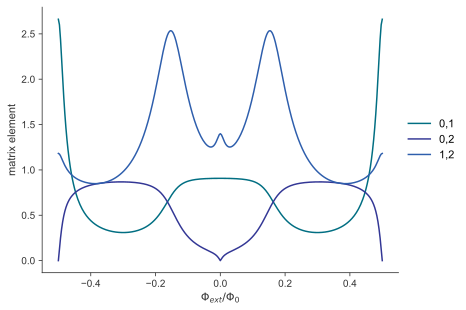

In [291]:
fig,ax = optimal_0_5.optimal_fluxonium.plot_matelem_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=np.linspace(-0.5,0.5,301),
    select_elems=[(0,1),(0,2),(1,2)]
)

In [292]:
bounds = {
    "small junction area (µm2)":    (0.01, 0.73/4),
    "hundreds of JJs":              (50,2000),
    }

optimal_arb = FluxoniumManager(flux=0.25, cutoff=100)
results_arb = optimal_arb.minimizer(bounds=bounds)

In [293]:
optimal_arb.optimal_params, optimal_arb.T2*1e6

([0.02262252761448847, 1737.0736501512542], 25.6938208994571)

# Phi_ext = Global

In [234]:
bounds = {
    "small junction area (µm2)":    (0.01, 0.73/4),
    "hundreds of JJs":              (50,200),
    "flux":                         (0,0.5),
    }

optimal_global = FluxoniumManager(cutoff=100)
optimal_global.minimizer(bounds=bounds)

In [294]:
optimal_global.optimal_params, optimal_global.T2*1e6

([0.07406160660769742, 62.253738423812194, 0.4999999940061037],
 48.73363133757036)

In [295]:
optimal_global.optimal_fluxonium

Fluxonium(**{'EJ': 7.566388910621828, 'EC': 1.925138079414859, 'EL': 0.8139763209902203, 'flux': 0.4999999940061037, 'cutoff': 100, 'truncated_dim': 6, 'id_str': 'Fluxonium_54279', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None})

## Coherence

In [296]:
flux_fix = optimal_global.optimal_fluxonium.flux
flux_array = np.linspace(flux_fix - 0.5, flux_fix + 0.5,301)

CQPS_flux_0_array = np.zeros(len(flux_array))
for i , flux in enumerate(tqdm(flux_array)):
    optimal_global.optimal_fluxonium.flux = flux
    CQPS_flux_0_array[i] = calculate_CQPS_rate(
    fluxonium=optimal_global.optimal_fluxonium,
    EJj=50.67,
    ECj=0.668,
    n_junctions=int(optimal_global.optimal_params[1]),
)
optimal_global.optimal_fluxonium.flux = flux_fix

  0%|          | 0/301 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

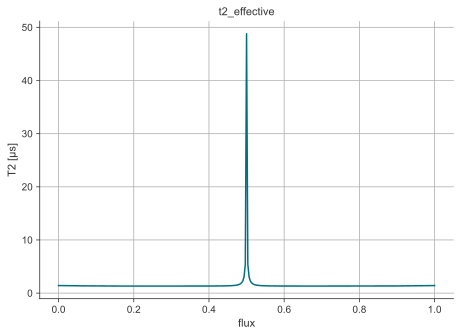

In [298]:
fig, ax = optimal_global.optimal_fluxonium.plot_t2_effective_vs_paramvals(
    param_name='flux',
    param_vals=flux_array,
    noise_channels=[
        ('t1_capacitive', dict(Q_cap=40 * 1e3)),
        ('t1_flux_bias_line', dict(M=800)),
        't1_inductive',
        't1_quasiparticle_tunneling',
        ('tphi_1_over_f_flux',dict(A_noise=1e-06))
    ],
    scale=1e-3,
)

# ax.plot(flux_array,1/CQPS_flux_0_array*1e-3)
ax.set_ylabel("T2 [µs]")
ax.set_yscale('linear')

## Eigenvalues vs. phi_ext

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

Text(0.5, 1.0, 'flux = 0.4999999940061037')

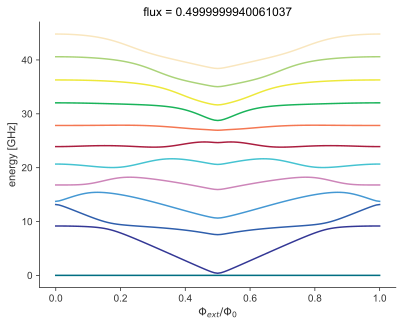

In [304]:
fig, ax = optimal_global.optimal_fluxonium.plot_evals_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(optimal_global.optimal_fluxonium.flux-0.5, optimal_global.optimal_fluxonium.flux+0.5, 101),
    evals_count=12,
    subtract_ground=True,
    )
ax.set_title(f'flux = {optimal_global.optimal_fluxonium.flux}')

## Wavefunctions

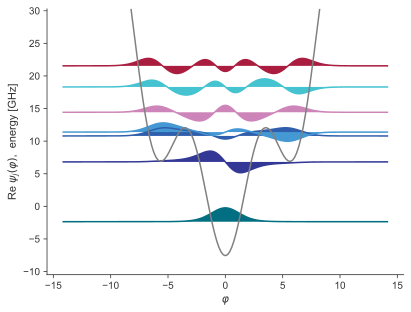

In [305]:
optimal_global.optimal_fluxonium.flux = 0
fig, ax = optimal_global.optimal_fluxonium.plot_wavefunction(
    which=[0,1,2,3,4,5,6]
)

## Phi matrix elements

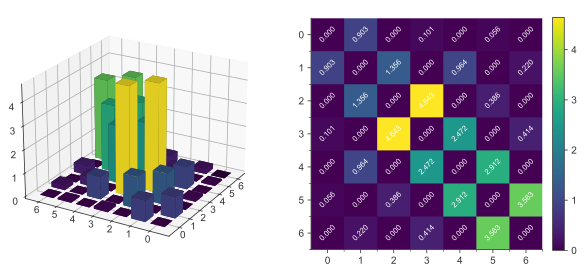

In [306]:
fig, ax = optimal_global.optimal_fluxonium.plot_matrixelements(
    operator='phi_operator',
    evals_count=7,
    show_numbers=True,
)

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

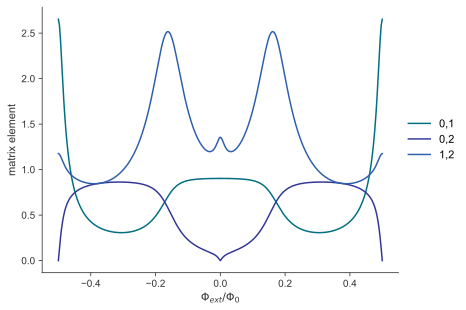

In [307]:
fig,ax = optimal_global.optimal_fluxonium.plot_matelem_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=np.linspace(-0.5,0.5,301),
    select_elems=[(0,1),(0,2),(1,2)]
)

# Fluxonium - Resonator

In [31]:
beta = 0.15
resonator_frequency = 6.5 #GHz
L_bare_resonator = 145e-9 #H Obtained from Marcelo's presentation.

fluxonium_resonator = create_fluxonium_resonator(
    fluxonium=fluxonium_0,
    beta=beta,
    resonator_frequency=resonator_frequency,
    L_bare_resonator=L_bare_resonator,
    flux=0,
    cutoff_ext_1=50,
    cutoff_ext_2=50,
    basis_completion="heuristic"
)

Spectral data:   0%|          | 0/51 [00:00<?, ?it/s]

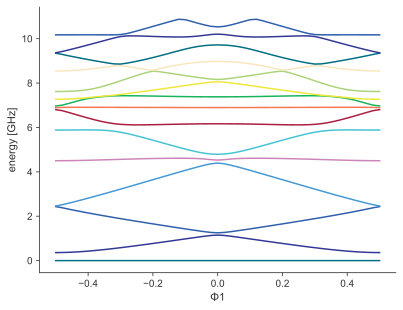

In [ ]:
flux_array = np.linspace(-0.5, 0.5, 51)
fig, ax = fluxonium_resonator.plot_evals_vs_paramvals(
    param_name='Φ1',
    param_vals=flux_array,
    evals_count=15,
    subtract_ground=True
)

## Convergence

In [ ]:
# Define ranges for the cutoffs
cutoff_ext_1_array = np.arange(30, 100, 5)
cutoff_ext_2_array = np.arange(30, 100, 5)

# Obtain the maximum cutoffs values
cutoff_ext_1_max = cutoff_ext_1_array[-1]
cutoff_ext_2_max = cutoff_ext_2_array[-1]

# Calculate the reference eigenvalues using the maximum cutoffs 
fluxonium_resonator_max = create_fluxonium_resonator(
    fluxonium=fluxonium_0,
    beta=beta,
    resonator_frequency=resonator_frequency,
    L_bare_resonator=L_bare_resonator,
    flux=0,
    truncated_dim=10,
    cutoff_ext_1=int(cutoff_ext_1_max),
    cutoff_ext_2=int(cutoff_ext_2_max),
)
reference_evals = fluxonium_resonator_max.eigenvals(evals_count=10)

# Create a matrix to store the eigenvalues deviations
eigenvalue_deviation_l2_matrix = np.zeros((len(cutoff_ext_1_array), len(cutoff_ext_2_array)))

# Iterate over both cutoff_ext_1 and cutoff_ext_2
for i, cutoff_ext_1 in enumerate(tqdm(cutoff_ext_1_array)):
    for j, cutoff_ext_2 in enumerate(cutoff_ext_2_array):
        fluxonium_resonator = create_fluxonium_resonator(
            fluxonium=fluxonium_0,
            beta=beta,
            resonator_frequency=resonator_frequency,
            L_bare_resonator=L_bare_resonator,
            flux=0,
            truncated_dim=10,
            cutoff_ext_1=int(cutoff_ext_1),
            cutoff_ext_2=int(cutoff_ext_2),
        )
        evals = fluxonium_resonator.eigenvals(evals_count=10)
        deviation = np.abs(evals - reference_evals)
        eigenvalue_deviation_l2_matrix[i, j] = np.linalg.norm(deviation)

  0%|          | 0/14 [00:00<?, ?it/s]

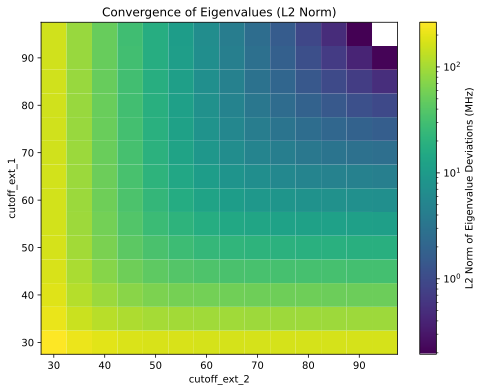

In [ ]:
# Graficar la norma L2 de las desviaciones de los autovalores
from matplotlib.colors import LogNorm
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(cutoff_ext_2_array, cutoff_ext_1_array)
plt.pcolormesh(X, Y, eigenvalue_deviation_l2_matrix / np.sqrt(10) * 1e3, shading='auto', cmap='viridis', norm=LogNorm())
plt.colorbar(label='L2 Norm of Eigenvalue Deviations (MHz)')
plt.xlabel('cutoff_ext_2')
plt.ylabel('cutoff_ext_1')
plt.title('Convergence of Eigenvalues (L2 Norm)')
plt.show()

## Dispersive shift

In [ ]:
# Definir rangos para los cutoff
cutoff_ext_1_array = np.arange(50, 80, 3)
cutoff_ext_2_array = np.arange(50, 80, 3)

# Crear una matriz para almacenar los desplazamientos dispersivos
dispersive_shift_matrix = np.zeros((len(cutoff_ext_1_array), len(cutoff_ext_2_array)))

# Iterar sobre ambos cutoff_ext_1 y cutoff_ext_2
for i, cutoff_ext_1 in enumerate(tqdm(cutoff_ext_1_array)):
    for j, cutoff_ext_2 in enumerate(cutoff_ext_2_array):
        fluxonium_resonator = create_fluxonium_resonator(
            fluxonium=fluxonium_0,
            beta=beta,
            resonator_frequency=resonator_frequency,
            L_bare_resonator=L_bare_resonator,
            flux=0,
            truncated_dim=10,
            cutoff_ext_1=int(cutoff_ext_1),
            cutoff_ext_2=int(cutoff_ext_2),
            ext_basis='discretized',
            basis_completion='heuristic'
        )
        evals = fluxonium_resonator.eigenvals(evals_count=10)
        dispersive_shift = (evals[9] - evals[1]) - (evals[7] - evals[0])
        dispersive_shift_matrix[i, j] = dispersive_shift

  0%|          | 0/10 [00:00<?, ?it/s]

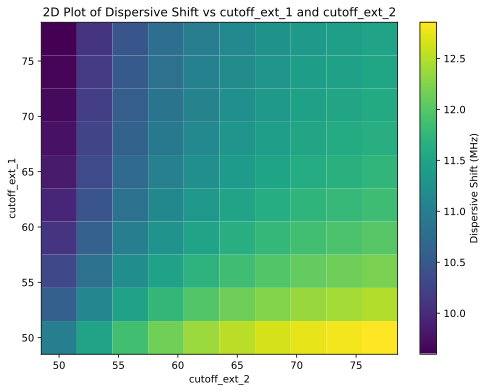

In [ ]:
# Graficar el desplazamiento dispersivo usando pcolormesh
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(cutoff_ext_2_array, cutoff_ext_1_array)
plt.pcolormesh(X, Y, dispersive_shift_matrix*1e3, shading='auto', cmap='viridis')
plt.colorbar(label='Dispersive Shift (MHz)')
plt.xlabel('cutoff_ext_2')
plt.ylabel('cutoff_ext_1')
plt.title('2D Plot of Dispersive Shift vs cutoff_ext_1 and cutoff_ext_2')
plt.show()

In [ ]:
beta_array = np.linspace(0.01, 0.1, 30)
dispersive_shift_array = np.zeros(len(beta_array))
resonator_frequency = 6.5 #GHz
L_bare_resonator = 145e-9 #H Obtained from Marcelo's presentation.

for i,beta in enumerate(tqdm(beta_array)):
    fluxonium_resonator = create_fluxonium_resonator(
        fluxonium=fluxonium_0,
        beta=beta,
        resonator_frequency=resonator_frequency,
        L_bare_resonator=L_bare_resonator,
        flux=0,
        cutoff_ext_1=50,
        cutoff_ext_2=50,
        basis_completion="heuristic"
    )
    evals = fluxonium_resonator.eigenvals(evals_count=10)
    dispersive_shift = (evals[9] - evals[1]) - (evals[7] - evals[0])
    dispersive_shift_array[i] = dispersive_shift

  0%|          | 0/30 [00:00<?, ?it/s]

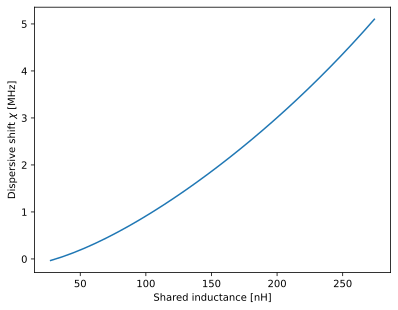

In [ ]:
L_coupled_array = El_to_L(fluxonium_0.EL/beta_array * 1e9) #H
fig,ax = plt.subplots(1,1)
ax.plot(L_coupled_array* 1e9, dispersive_shift_array*1e3)
ax.set_ylabel(r'Dispersive shift $\chi$ [MHz]')
ax.set_xlabel('Shared inductance [nH]')
plt.show()

The shared inductance is bigger than the bare resonator inductance, let's validate if we are still in the dispersive regime.

Spectral data:   0%|          | 0/51 [00:00<?, ?it/s]

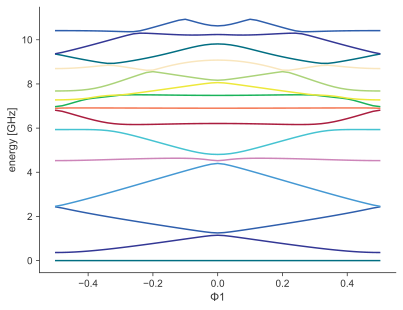

In [ ]:
fig, ax = fluxonium_resonator.plot_evals_vs_paramvals(
    param_name='Φ1',
    param_vals=np.linspace(-0.5, 0.5,51),
    evals_count=15,
    subtract_ground=1
)

# Fluxonium - Flux line

In [ ]:
Phi0 = const.h/2/const.e
separation_array = np.linspace(15,25,10)
mutual_array = np.zeros_like(separation_array)
for i,separation in enumerate(tqdm(separation_array)):
    mutual_array[i] = calculate_mutual(loop_size=[12.4,63.6],
                    offset_position=[separation,13.2],
                    flux_line_length=90,
                    flux_line_width=7)/Phi0

  0%|          | 0/10 [00:00<?, ?it/s]

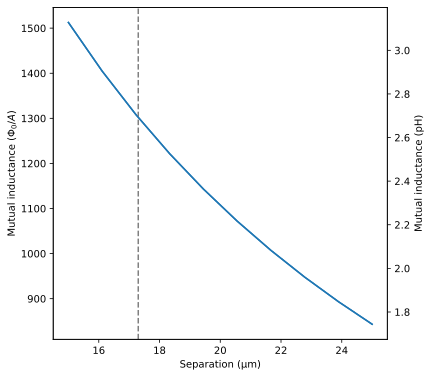

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(separation_array,mutual_array)
ax.set_xlabel('Separation (µm)')
ax.axvline(17.3, linestyle='dashed', color='gray')
ax.set_ylabel(r'Mutual inductance $(\Phi_0/A)$')

ax2 = ax.twinx()
# Trazar el segundo conjunto de datos en el eje Y derecho
ax2.plot(separation_array, mutual_array*Phi0*1e12)
ax2.set_ylabel('Mutual inductance (pH)')
plt.show()